In [31]:
from sklearn import datasets as ds
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
boston=ds.load_boston()

In [33]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [34]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [35]:
data=pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [36]:
data['TARGET']=boston['target']

In [37]:
#data.shape

In [38]:
#removing outliers
#data= data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]
#data.shape

In [39]:
#for i in boston.feature_names:
    #plt.scatter(data[i],data['TARGET'])
    #plt.show()

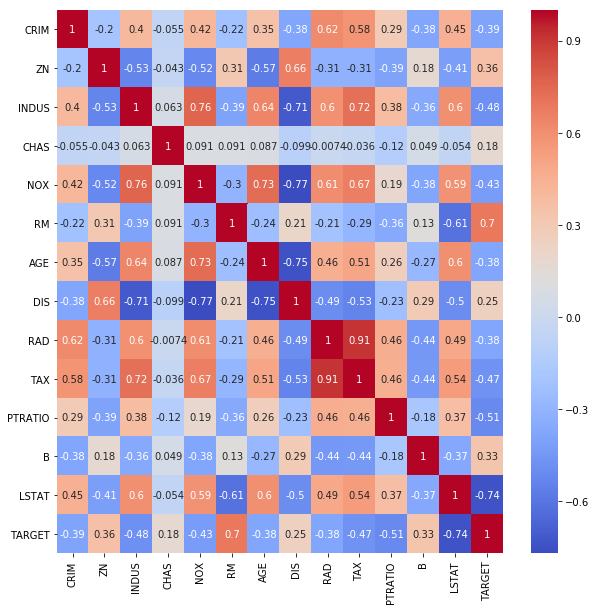

In [40]:
corr=data.corr()
plt.rcParams["figure.figsize"] = (10,10)
seaborn.heatmap(corr, cmap = "coolwarm", annot = True)

In [41]:
Y= data['TARGET']
data=data.drop(['RAD','TARGET'],axis=1)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [42]:
data.shape

(506, 12)

In [43]:
data = (data - data.min())/(data.max() - data.min())
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.000000,0.180,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.000,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.000,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.000,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338
5,0.000264,0.000,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.066794,0.648936,0.992990,0.096026
6,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.402923,0.236641,0.276596,0.996722,0.295254
7,0.001554,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.236641,0.276596,1.000000,0.480684
8,0.002303,0.125,0.271628,0.0,0.286008,0.396628,1.000000,0.450354,0.236641,0.276596,0.974104,0.778146
9,0.001840,0.125,0.271628,0.0,0.286008,0.468097,0.854789,0.496731,0.236641,0.276596,0.974305,0.424117


In [44]:
X=data
n=200

In [45]:
X.shape,Y.shape

((506, 12), (506,))

In [47]:
    train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=0)
        model = LinearRegression().fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        trainloss+=mean_squared_error(Y_train, Y_predtrain)
        testloss+=mean_squared_error(Y_test, Y_predtest)
        
    print(train_score/n)
    print(trainloss/n)
    print(test_score/n)
    print(testloss/n)

0.7602451976110676
20.6283161019678
0.6512527210236816
28.116751419292413


In [ ]:
#from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#from sklearn.linear_model import Ridge

In [99]:
   # train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
        model = Ridge(alpha=0.1).fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        trainloss+=mean_squared_error(Y_train, Y_predtrain)
        testloss+=mean_squared_error(Y_test, Y_predtest)
        
    print(train_score/n)
    print(trainloss/n)
    print(test_score/n)
    print(testloss/n)

0.7312912356378105
22.13683087105666
0.6946262795372965
25.131886367887958


In [18]:
#poly=PolynomialFeatures(3)
x_new=poly.fit_transform(X)

In [19]:
  #  train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, test_size=0.33)
        model = Ridge(alpha=0.01).fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        trainloss+=mean_squared_error(Y_train, Y_predtrain)
        testloss+=mean_squared_error(Y_test, Y_predtest)
        
    print(train_score/n)
    print(trainloss/n)
    print(test_score/n)
    print(testloss/n)

0.954586840107989
3.744079730781676
0.8460180810082097
12.604853632649126


In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [44]:
boston=datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [45]:
data=pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [46]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


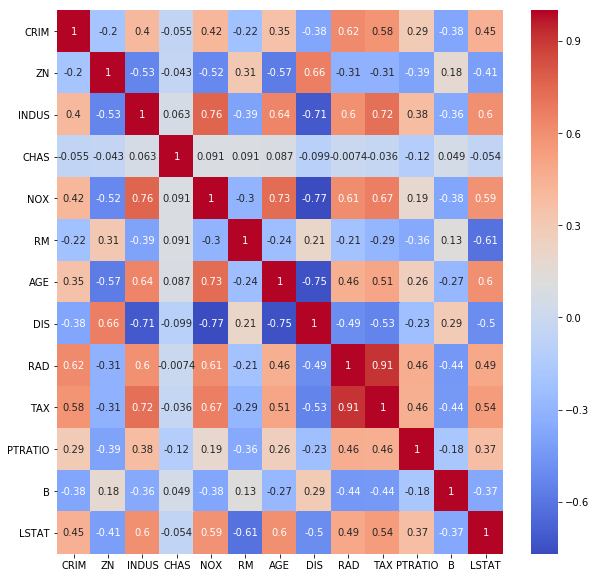

In [47]:
corr=data.corr()
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(corr,cmap='coolwarm',annot= True )

In [48]:
y=boston['target']
x=data.drop(['TAX'],axis=1)

In [52]:
n=200
error=0
score=0
for i in range(n):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=1)
    model=LinearRegression().fit(x_train,y_train)
    score+=model.score(x_test,y_test)
    y_pred=model.predict(x_test)
    error=error+ mean_squared_error(y_pred,y_test) 
print(error/n)
print(score/n)

21.05223337698137
0.7618353446690924


In [57]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
poly=PolynomialFeatures(3)
x=poly.fit_transform(x)

In [58]:
n=200
error=0
score=0
for i in range(n):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=1)
    model=Ridge(alpha=0.01).fit(x_train,y_train)
    score+=model.score(x_test,y_test)
    y_pred=model.predict(x_test)
    error=error+ mean_squared_error(y_pred,y_test) 
print(error/n)
print(score/n)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.544019e-20
  overwrite_a=True).T


19.247139259023598
0.7822564378018173
